# Test Classifier
Code taken from [pytorch.org](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

In [24]:
import torch                                # Machine learning library
import torchvision                          # Computer vision library
import torchvision.transforms as transforms # Transform models

import matplotlib.pyplot as plt             # Render images
import numpy as np                          # Maths

In [25]:
# Add transformers to the model
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# Number of samples processed on each iteration. A batch is the size of how many
# samples will be processed at once. The larger the batch, the faster the model
# will learn, but the more memory will be used.
batch_size = 4

# Note: The CIFAR10 dataset will be downloaded if it doesn't already exist.

# Trainset takes a large portion of the dataset as training set. The default
# value is 90%. We use the training set to train the model and make predictions.
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

# Trainloader loads the training set in the form of batches. The training set is
# shuffled. num_workers determines how many worker processes is used for loading
# data in parallel.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


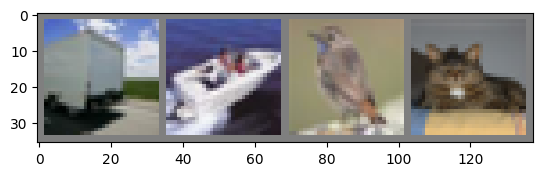

truck ship  bird  cat  


In [26]:
# Show images
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Display the images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Note: This is the ground truth. This is we compare our model against. Ground
# truth means this is the fact. On the contrary, our model makes predictions,
# and these inherently may be incorrect.

# Define the Convolutional Neural Network
In this example, we will implement the following:

- Convolution: A 2d convolutional layer with `x` input channels, `y` output channels and kernel size of `z * z`
- Max pooling: A layer with `x * x` kernel size and stride of `y`
- Linear layer: A fully connected layer with `x` input features and `y` output features. `nn.Linear(16*5*5, 120)` means 16 features, 5x5 spatial dimensions and output size of 120.

## Max Pooling
A technique to downsample data,, commonly used in convolutional neural networks. It divides areas in the data into non-overlapping blocks and picks the maximum value in each block.

If you want to know more, use your favourite search engine to look them up.

In [27]:
# Define convolutional neural network
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional layer: applies a filter to the input image to extract features.
        self.conv1 = nn.Conv2d(3,6,5)
        # Max pooling layer
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        # Fully connected layer
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    # ReLU: https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
    # Propagate one step through the network.
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [28]:
# Loss function and optimizer
import torch.optim as optim

# Cross entropy loss: Measure the difference between predicted probability and
# the truth. There are many loss functions, but cross entropy is commonly used
# in classification problems.
# In short, loss is a quantitative measure of how our model's prediction
# performs.
criterion = nn.CrossEntropyLoss()

# Stochastic gradient descent: Minimize the loss function.
# Learning rate: Step size in learning process. Too high value: overshoots the optimal value. Too low: too slow process.
# Momentum: Adds a fraction from the vector in the previous time step to the current.
#
# For info: an optimiser aims to improve the model's predictions (performance)
# by adjusting weights. Weights impacts how much a node's output contributes to
# the propagated node's input.
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [29]:
# Train the network
# Please note this takes time, depending on your hardware. At the moment, we use
# CPU. This is slow!
# If you have saved the model in a file, this step is only necessary to
# execute when you want to improve or make changes to the model.

for epoch in range(2): # Loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs from dataset
        # inputs = image
        # labels = class
        # data = data from the trainloader
        inputs, labels = data

        # zero the parameter gradients. Gradients means the change in the
        # weights
        optimizer.zero_grad()

        # forward + backward propagation + optimize
        # This is how we traverse the neural network. In CNN we perform forward
        # and backward propagation before we optimize the weights.
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.165
[1,  4000] loss: 1.837
[1,  6000] loss: 1.665
[1,  8000] loss: 1.539
[1, 10000] loss: 1.514
[1, 12000] loss: 1.439
[2,  2000] loss: 1.376
[2,  4000] loss: 1.372
[2,  6000] loss: 1.331
[2,  8000] loss: 1.295
[2, 10000] loss: 1.283
[2, 12000] loss: 1.269
Finished Training


In [30]:
# Save the model
# More about this: https://pytorch.org/docs/stable/notes/serialization.html
PATH = './cifar_net.pth'

In [31]:
# Execute this block only if you actually trained the model. Otherwise you might
# get unexpected results.
torch.save(net.state_dict(), PATH)

# Comparison
Now, let's compare the model's prediction to the ground truth.

Data to classify:


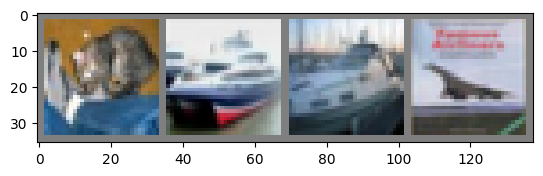

GroundTruth:  cat   ship  ship  plane
Predicted:  cat   plane plane plane


In [34]:
### Ground truth
dataiter = iter(testloader)
images, labels = next(dataiter)

# Display the images
print("Data to classify:")
imshow(torchvision.utils.make_grid(images))

print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Prediction
# Load model from disk. This is not necessary if you just trained the model.
net = Net()
net.load_state_dict(torch.load(PATH))

# Vectors with our predictions
outputs = net(images)

_, predicted = torch.max(outputs, 1)

# Print outcome
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(batch_size)))


In [35]:
# Measure performance
correct = 0
total = 0

# We are not training, so no need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


In [36]:
# Report on classes' performance
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 69.0 %
Accuracy for class: car   is 74.2 %
Accuracy for class: bird  is 39.3 %
Accuracy for class: cat   is 30.6 %
Accuracy for class: deer  is 57.6 %
Accuracy for class: dog   is 42.3 %
Accuracy for class: frog  is 66.4 %
Accuracy for class: horse is 64.7 %
Accuracy for class: ship  is 50.2 %
Accuracy for class: truck is 51.4 %


# Training on GPU
Now you can compare training the model on the GPU vs on the CPU. You won't
notice a huge difference because the model's size of small.

In [31]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# If CUDA is supported, we get something like 'cuda:0'
print(device)

cuda:0


In [32]:
# Recursively go over all modules and convert parameters and buffers to CUDA tensors
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [35]:
# Train the network
for epoch in range(2): # Loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs from dataset
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients. Gradients means the change in the weights
        optimizer.zero_grad()

        # forward + backward propagation + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.285
[1,  4000] loss: 1.288
[1,  6000] loss: 1.280
[1,  8000] loss: 1.287
[1, 10000] loss: 1.263
[1, 12000] loss: 1.287
[2,  2000] loss: 1.288
[2,  4000] loss: 1.290
[2,  6000] loss: 1.292
[2,  8000] loss: 1.287
[2, 10000] loss: 1.259
[2, 12000] loss: 1.283
Finished Training
